### **AlexNet 구현**

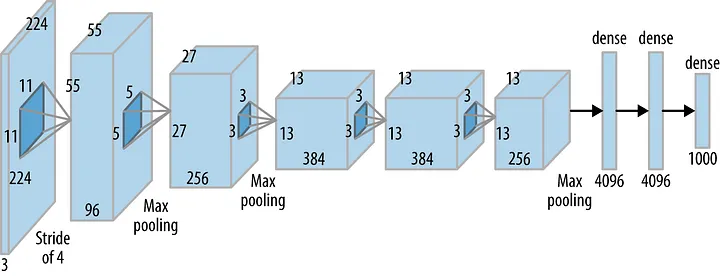

In [2]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        
        self.covn = nn.Sequential(
                                # conv1
                                nn.Conv2d(3, 96, kernel_size = 11, stride = 4),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size = 3, stride = 2),
                                
                                # conv2
                                nn.Conv2d(96, 256, kernel_size = 5, padding = 2),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size = 3, stride = 2),
                                
                                # conv3
                                nn.Conv2d(256, 384, kernel_size=3, padding=1),
                                nn.ReLU(),
                                
                                # conv4
                                nn.Conv2d(384, 384, kernel_size=3, padding=1),
                                nn.ReLU(),
                                
                                # conv5
                                nn.Conv2d(384, 256, kernel_size=3, padding=1),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size = 3, stride = 2))
        
        # fully connected layer
        # fc1
        
        self.fc = nn.Sequential(
                                # fc1
                                nn.Linear(256*6*6, 4096),
                                nn.Dropout(0.5),        
                                nn.ReLU(),
                            
                                # fc2
                                nn.Linear(4096, 4096),
                                nn.Dropout(0.5),
                                nn.ReLU(),

                                # fc3
                                nn.Linear(4096, 1000))
                            
    def forward(self, x):

        # conv
        x = self.covn(x)
        print(x.shape)
        
        # x = x.view(-1, 256*6*6)
        x = x.view(x.size(0), -1)
        print(x.shape)

        # fc
        x = self.fc(x)
        
        return x
    
    
model = AlexNet()


model

AlexNet(
  (covn): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): ReLU()
    (

In [ ]:

dt = torch.rand(1, 3, 227, 227)

model(dt)